# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *D*

**Names:**

* *Marc Bickel*
* *Cyril Cadoux*
* *Emma Lejal Glaude*

---

#### Instructions

*This is a template for part 1 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.1 Exploration of real networks

#### Exercise 2.1

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

G = nx.Graph()

file = open('../data/network1.csv','r')
for row in file:
    if (row[0] != '#') : 
        indexes  = row.split(',')
        indexes[1] = (indexes[1].split('\n'))[0]
        G.add_edge(indexes[0],indexes[1])

print('The number of edges in this graph is ', len(G.edges()))
print('The number of nodes in this graph is ', len(G.nodes()))

The number of edges in this graph is  18584
The number of nodes in this graph is  13033


#### Exercise 2.2:  Node degree distribution

(array([  1.26210000e+04,   2.01000000e+02,   7.70000000e+01,
          4.00000000e+01,   2.00000000e+01,   9.00000000e+00,
          1.00000000e+01,   1.10000000e+01,   5.00000000e+00,
          6.00000000e+00,   3.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   4.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

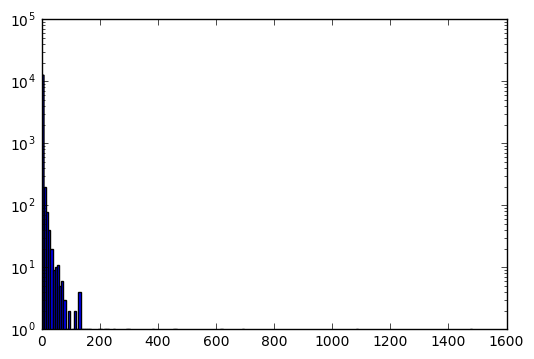

In [2]:
degrees = nx.degree(G)
plt.hist(list(degrees.values()), bins= 200, log = True)

#### Exercise 2.3: Giant component

In [3]:
sorted_components = sorted(nx.connected_components(G), key = len, reverse=True)
print('Number of connected components ', len(sorted_components))
sizes = list()
for comp in sorted_components:
    sizes.append(len(comp))

print('We can see that there is a giant component as the biggest component has size', sizes[0])
print('The second largest component has size', sizes[1])

Number of connected components  192
We can see that there is a giant component as the biggest component has size 12576
The second largest component has size 16


#### Exercise 2.4: Short paths & Small-worlds

In [6]:
#Run this cell only once !
shortest_paths_lengths = nx.all_pairs_shortest_path_length(G)

In [7]:
items = list(shortest_paths_lengths.items())
#items is a list of tuples, each tuple is define like this
#items[0] is a tuple (starting_node, dict(key= ending_node, val=number of connections needed to reach starting_node))

number_of_values = 0
sum = 0
for e in items:
    partial_vals = list(e[1].values())
    sum += np.sum(partial_vals)
    #e_th elem of the list, second elem of the tuples, values of this second elem
    number_of_values += len(partial_vals)
    
print('The mean of all connections between two nodes is', float(sum/number_of_values))
print('As the average distance between two nodes is 4.17 we can say that this graph is a small world')

The mean of all connections between two nodes is 4.175127915959493


#### Exercise 2.5: Network comparison

The number of edges in this second graph is  43516
The number of nodes in this second graph is  26542
Number of connected components in second graph  5
We can see that there is a giant component as the biggest component has size 26481
The second largest component has size 30


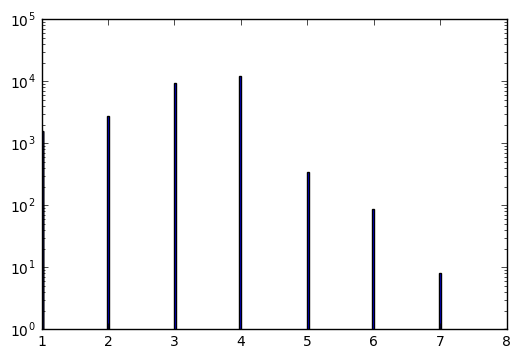

In [12]:
H = nx.Graph()
file_2 = open('../data/network2.csv','r')
for row in file_2:
    if (row[0] != '#') : 
        indexes  = row.split(',')
        indexes[1] = (indexes[1].split('\n'))[0]
        H.add_edge(indexes[0],indexes[1])

print('The number of edges in this second graph is ', len(H.edges()))
print('The number of nodes in this second graph is ', len(H.nodes()))
degrees_2 = nx.degree(H)
plt.hist(list(degrees_2.values()), bins= 200, log = True)
sorted_components_2 = sorted(nx.connected_components(H), key = len, reverse=True)
print('Number of connected components in second graph ', len(sorted_components_2))
sizes_2 = list()
for comp in sorted_components_2:
    sizes_2.append(len(comp))

print('We can see that there is a giant component as the biggest component has size', sizes_2[0])
print('The second largest component has size', sizes_2[1])

In [13]:
#Run this cell only once !!
shortest_paths_lengths_H = nx.all_pairs_shortest_path_length(H)

In [17]:
items_2 = list(shortest_paths_lengths_H.items())

number_of_values_2 = 0
sum_2 = 0
for e in items_2:
    partial_vals_2 = list(e[1].values())
    sum_2 += np.sum(partial_vals_2)
    #e_th elem of the list, second elem of the tuples, values of this second elem
    number_of_values_2 += len(partial_vals_2)
    
print('The mean of all connections between two nodes is', float(sum_2/number_of_values_2))

The mean of all connections between two nodes is 97.55320155456225


This second network is really different from the first one.
The first one has 18000 links and 13000 nodes and the second one has 43000 and 26000, we are in order of magnitude talking about a twice as big network.
However the second graph which is bigger only has 5 components against almost 200 for the first one. 
We can see that bigger the graph is the more it is connected and looks like a Giant Component.
Regarding the degrees of the nodes, the two graphs have a completely different distribution, what we approximated as a decreasing exponential with graph one is more of a gaussian on a very limited number of values of degrees.
Indeed the maximum degree of the first graph is over 1400 whereas the maximum degree of the second graph is 8.
In regards of the "small world" property, the second graph doesn't not meet the condition to be one. Indeed the the average number of connexions to join any 2 points of the graph is 97.55 which is way above the criteria of 6.

#### Exercise 2.6: Network identification

Our guess is that the first graph represents the subgraph of the routers as it is possible to have one central router with more than a thousand connexions.
Following the argument of the degree of a node, considering intersections of roads, we can hardly imagine 2 intersections with more than 8 roads in common, so the second graph has to be the one of the roads of New York